In [1]:
from  utils.preprocessing import polygon_to_mask, json_to_dataframe, visualize
from datasets.data import DatasetRetriever, TestDataset
from augmentations.transforms import get_train_transforms, get_test_transforms
from torch.utils.data import DataLoader
import torch

In [2]:
model = torch.load("best_model.pth")
model=model.cuda()

In [3]:
transforms = get_test_transforms()
df = json_to_dataframe("data",train=False)

In [4]:
df

,name
0,056
1,062
2,074
3,103
4,061
...,...
102,105
103,059
104,045
105,099


In [5]:
test_dataset = TestDataset("data",df)

In [6]:
test_dataset[0].shape

torch.Size([3, 512, 640])

In [7]:
test_dataloader = DataLoader(test_dataset, batch_size=1)
batch = next(iter(test_dataloader))
batch.shape

torch.Size([1, 3, 512, 640])

In [8]:
pred_mask, label = model(batch.cuda())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


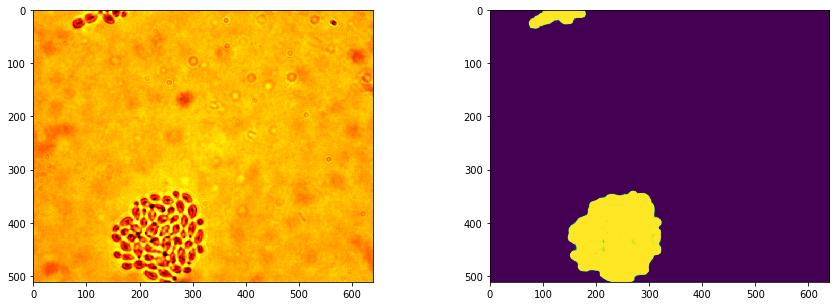

In [9]:
visualize(batch[0], pred_mask[0])



In [11]:
torch.argmax(label)

tensor(3, device='cuda:0', grad_fn=<NotImplemented>)

In [15]:
json_to_dataframe("data")['label'].factorize()


(array([0, 1, 2, 2, 3, 0, 2, 2, 0, 0, 1, 3, 1, 0, 1, 0, 3, 4, 1, 3, 1, 3,
        1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 4, 1, 1, 3, 2, 1, 0, 1, 4, 0, 0, 3,
        3, 1, 2, 3, 4, 3, 1, 4, 2, 4, 3, 1, 3, 1, 0, 2, 1, 3, 1, 1, 3, 3,
        0, 5, 3, 3, 3, 0, 0, 4, 1, 3, 4, 3, 3, 1, 3, 4, 2, 1, 1, 1, 3, 0,
        4, 1, 5, 0, 2, 4, 1, 3, 3, 3, 3, 2, 1, 1, 3, 1, 3, 3, 3, 4, 3, 3,
        0, 1, 3, 4, 3, 4, 3, 4, 1, 3, 4, 2, 3, 1, 4, 1, 4, 3, 1, 0, 1, 1,
        5, 1, 1, 4, 1, 4, 3, 1, 5, 2, 1, 4, 3, 1, 1, 4, 1, 3, 3, 0, 4, 1,
        4, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 2, 3, 1, 3, 5, 1, 1, 2, 4, 1, 4,
        0, 1, 3, 1, 3, 0, 2, 0, 3, 1, 3, 3, 1, 1, 0, 1, 3, 1, 4, 4, 3, 5,
        1, 3, 4, 4, 4, 1, 3, 5, 3, 1, 0, 5, 1, 0, 1, 4, 1, 3, 5, 2, 1, 3,
        1, 1, 2, 0, 4, 4, 4, 5, 3, 3, 1, 3, 1, 5, 1, 5, 4, 3, 3, 5, 1, 3,
        1, 1, 1, 1, 3, 4, 4, 3, 1, 1, 3, 1, 1, 1, 3, 5, 1, 1, 1]),
 Index(['staphylococcus_epidermidis', 'ent_cloacae', 'staphylococcus_aureus',
        'c_kefir', 'moraxella_catarrhalis

In [16]:
label2id = {0:"staphylococcus_epidermidis", 1:"ent_cloacae", 2: "staphylococcus_aureus", 3:"c_kefir",
            4:"moraxella_catarrhalis", 5:"klebsiella_pneumoniae"}

In [22]:
label2id[torch.argmax(label).item()]

'c_kefir'

In [24]:
import base64
from io import BytesIO
from PIL import Image

In [46]:
import torchvision
mask = torchvision.transforms.ToPILImage()(pred_mask[0].cpu())
buff = BytesIO()
mask.save(buff, format='PNG')
new_image_string = base64.b64encode(buff.getvalue()).decode("utf-8")
new_image_string

'iVBORw0KGgoAAAANSUhEUgAAAoAAAAIACAAAAAA3FoInAAAaTUlEQVR4nO3daZRcZZkH8Od5762q3pd0OgkhISsJCaDEEIIwAUVQNgmLojKMC0fRUc4Mx1FGx+XMweUMOjof3DjOKGdGPI7KUXGUcYARBmQLIcQQQyBhyWqnk07v3dVV977PfKjq6trrVt17u+6t/v8+QHd11a2b6n+/233f9zL5i1WkbfEb1y1cMK+rvTmqREQnE3FqiUWipmJnxxASa+LP++Lxybi29fCj+0eSJCT+njjMDtPn47PRsvLyK05tikYUK2IhEa01RwxWzo9BHI12rhUS0XZibOEPRhG/huFzAJnNnrdctzqmaLq0EyIRdlr4ZR8p9f/m9iueeAX5axjOy6HacGzlpataTKU4TSlWhpGVv/Tj019VPKCxZJNC/hqG71Vwy4b1zbmp4rJf5jy3aNBiGwxvzg0CwN8AGl3v+Juzm6qubjN4JoOpgwgRcScC2Dj8DCBHV356a2e5Sl6oaDglp2SU1P9S3wkRt/vdboDZ42MAjfbz/mFzrMKThPJqXRLKTWAqdNnPaPG73QCzx7/fpdFz7W1rI0SUU5MWkx23Ys9jyf06hgA2Dn9+l8xm04qbrlvqydFzikQhkl2DXhwWAsGXAJptC878i4tWtRk1dz+yCkXJfkCIaPKnU+5ODwLEjwBG11578Rnd0fzBZiYqXxUXNf0CSfdGSL/we9vd+UGA+BDAyLp/Oq/NLFH4FW0OZpV30+09KXh9+ge671t/xjh04/A+gOaSWza2G4XjyQ6r45yEFiYteeTH/5d0c3oQLB4HkDm69JZrO8s2/rhSAcZCOSnUyUTUUCy2HT/45IPPH9denCkEQ+1XKYodLNLcu+6GS3uL1r/53Yqyp5F5ip46um/bswdjsWZjZGxicjJh2TZq4AbiZQnIC8/fuGHVKa1VTXUpbOwRZUrJ5Mkn7t02lEDkGpeHAeT2j2xd2B6rOM8